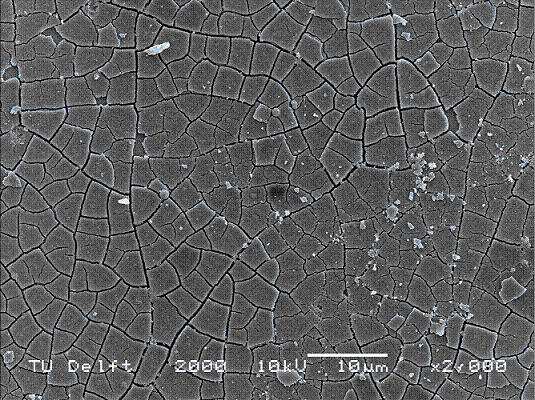

In [1]:
import json
from pyld import jsonld
from PIL import Image
from typing import Dict


class Microstructure:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        
    def __getattr__(self, k):
        self.__dict__.get(k)
        
    def __setattr__(self, k, v):
        self.__dict__[k] = v
    
    
ms = Microstructure(**{
        "@id": "Microstructure_thin_ZnO_layer.jpg",
        "image": Image.open("Microstructure_thin_ZnO_layer.jpg"),
    })


getattr(ms, "image")

In [2]:
def default(obj):
    if isinstance(obj, Microstructure):
        return getattr(obj, "@id")

jprint = lambda j: print(json.dumps(j, indent=2, default=default))

jconvert = lambda j: json.loads(json.dumps(j, default=default))


doc = {
    "@context": {
        "mat": "https://pages.nist.gov/material-schema/",
        "mathub": "https://api.materialhub.org/objects/",
        "schema": "http://schema.org/",
        "xsd": "https://www.w3.org/2001/XMLSchema#",
        "name": {
            "@id": "schema:name",
            "@type": "xsd:string"
        },
        "variableMeasured": {
            "@id": "schema:variableMeasured"
        },
        "hasPart": {
            "@id": "schema:hasPart",
            "@type": "@id"
        },
        "value": {
            "@id": "schema:value"
        },
        "valueId": {
            "@id": "schema:valueId",
            "@type": "@id"
        },
        "unitCode": {
            "@id": "schema:unitCode",
            "@type": "@id"
        },
        "mat:materialReference": {
            "@type": "@id"
        }
    },
    "@graph": [
        {
            "@type": "mat:Material",
            "@id": "mathub:0001",
            "name": "steel",
            "variableMeasured": {
                "@id": "mathub:0002",
                "@type": "schema:PropertyValue",
                "value": "200",
                "valueId": "mathub:0004",
                "unitCode": "mathub:0005"
            },
            "hasPart": "mathub:0003"
        },
        {
            "@type": "mat:MaterialStructure",
            "mat:materialReference": "mathub:0001",
            "mat:payloads": ms
        }
    ]
}

jprint(doc)

docld = jconvert(doc)
jprint( jsonld.expand(docld) )
jprint( jsonld.normalize(docld) )

{
  "@context": {
    "mat": "https://pages.nist.gov/material-schema/",
    "mathub": "https://api.materialhub.org/objects/",
    "schema": "http://schema.org/",
    "xsd": "https://www.w3.org/2001/XMLSchema#",
    "name": {
      "@id": "schema:name",
      "@type": "xsd:string"
    },
    "variableMeasured": {
      "@id": "schema:variableMeasured"
    },
    "hasPart": {
      "@id": "schema:hasPart",
      "@type": "@id"
    },
    "value": {
      "@id": "schema:value"
    },
    "valueId": {
      "@id": "schema:valueId",
      "@type": "@id"
    },
    "unitCode": {
      "@id": "schema:unitCode",
      "@type": "@id"
    },
    "mat:materialReference": {
      "@type": "@id"
    }
  },
  "@graph": [
    {
      "@type": "mat:Material",
      "@id": "mathub:0001",
      "name": "steel",
      "variableMeasured": {
        "@id": "mathub:0002",
        "@type": "schema:PropertyValue",
        "value": "200",
        "valueId": "mathub:0004",
        "unitCode": "mathub:0005"
    

In [3]:
## Multiple Contexts (e.g., how to update a context)

doc1 = {
    "@context": [
        {
            "schema": "http://schema.org/",
            "hasPart": {
                "@id": "schema:hasPart"
            }
        }
    ],
    "@graph": [
        {
            "hasPart": "mathub:0003"
        }
    ]
}

doc2 = {
    "@context": [
        {
            "schema": "http://schema.org/",
            "hasPart": {
                "@id": "schema:hasPart"
            }
        },
        {
            "schema": "http://schema.org/",
            "hasPart": {
                "@id": "schema:hasPart",
                "@type": "@id"
            }
        }
    ],
    "@graph": [
        {
            "hasPart": "mathub:0003"
        }
    ]
}

print( jsonld.expand(doc1) )
print( jsonld.expand(doc2) )

[{'http://schema.org/hasPart': [{'@value': 'mathub:0003'}]}]
[{'http://schema.org/hasPart': [{'@id': 'mathub:0003'}]}]
